<a href="https://colab.research.google.com/github/TaliOrsi/Portif-lio-Dados/blob/main/Projeto_Ol%C3%ADmpico_19_07_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etapa 1 - Vamos analisar 120 anos de dados históricos dos Jogos Olímpicos, começando nos jogos de Atenas indo até o Rio de Janeiro em 2016, utilizando Ciência de Dados.

Etapa 2 - Coleta de dados 
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=noc_regions.csv


Etapa 3 - Análise, interpretação e visualização dos Dados
*importando as bibliotecas

In [ ]:
#manipulação de dados
import pandas as pd

#visualização
import missingno 
import seaborn as sns
import matplotlib.pyplot as plt


#machine learning

In [ ]:
df_atleta = pd.read_csv("athlete_events.csv")

In [ ]:
df_atleta.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df_atleta.tail(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
df_atleta.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
df_atleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Dicionário de dados

ID - Número único para cada atleta
Nome - nome do atleta
Sexo - M ou F
Idade - Inteiro
Altura - em centímetros
Peso - em quilogramas
Equipe - nome da equipe
NOC - Código de 3 letras do Comitê Olímpico Nacional
Jogos - ano e temporada
Ano - Inteiro
Temporada - verão ou inverno
Cidade - Cidade -sede
Esporte - Esporte
Evento - Evento
Medalha - Ouro, Prata, Bronze ou NA

In [ ]:
df_atleta.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
df_atleta.rename(columns= {"ID": "id_atleta" , "Name": "nome_atleta" , "Sex" : "sexo_atleta", "Age": "idade" , "Height":"altura_atleta" , "Weight" : "peso_atleta", 
                           "Team": "equipe", "NOC": "noc" , "Games": "ano_temporada", "Year": "ano" , 
                           "Season": "temporada" , "City": "cidade_sede" , "Sport": "modalidade_esportiva" , "Event" : "evento",
                           "Medal": "medalha"}, inplace=True)

Temporada


In [ ]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Temporada


In [ ]:
df_atleta["temporada"].nunique()

2

In [ ]:
df_atleta["temporada"].unique()

array(['Summer', 'Winter'], dtype=object)

In [ ]:
df_atleta = df_atleta[df_atleta["temporada"] == "Summer"]

In [ ]:
df_atleta["temporada"].unique()

array(['Summer'], dtype=object)

###Informações Estatísticas

In [ ]:
df_atleta.describe().round(3)

,id_atleta,idade,altura_atleta,peso_atleta,ano
count,222552.000,213363.000,170695.000,168698.000,222552.000
mean,67998.926,25.674,175.516,70.689,1976.317
std,39139.038,6.700,10.915,14.804,30.943
min,1.000,10.000,127.000,25.000,1896.000
25%,34000.750,21.000,168.000,60.000,1956.000
50%,68302.500,24.000,175.000,70.000,1984.000
75%,101881.000,28.000,183.000,79.000,2000.000
max,135568.000,97.000,226.000,214.000,2016.000


###Dados Faltantes

In [ ]:
df_atleta.isnull().sum()

id_atleta                    0
nome_atleta                  0
sexo_atleta                  0
idade                     9189
altura_atleta            51857
peso_atleta              53854
equipe                       0
noc                          0
ano_temporada                0
ano                          0
temporada                    0
cidade_sede                  0
modalidade_esportiva         0
evento                       0
medalha                 188464
dtype: int64

In [ ]:
df_atleta.isnull().sum().sort_values(ascending=False)

medalha                 188464
peso_atleta              53854
altura_atleta            51857
idade                     9189
evento                       0
modalidade_esportiva         0
cidade_sede                  0
temporada                    0
ano                          0
ano_temporada                0
noc                          0
equipe                       0
sexo_atleta                  0
nome_atleta                  0
id_atleta                    0
dtype: int64

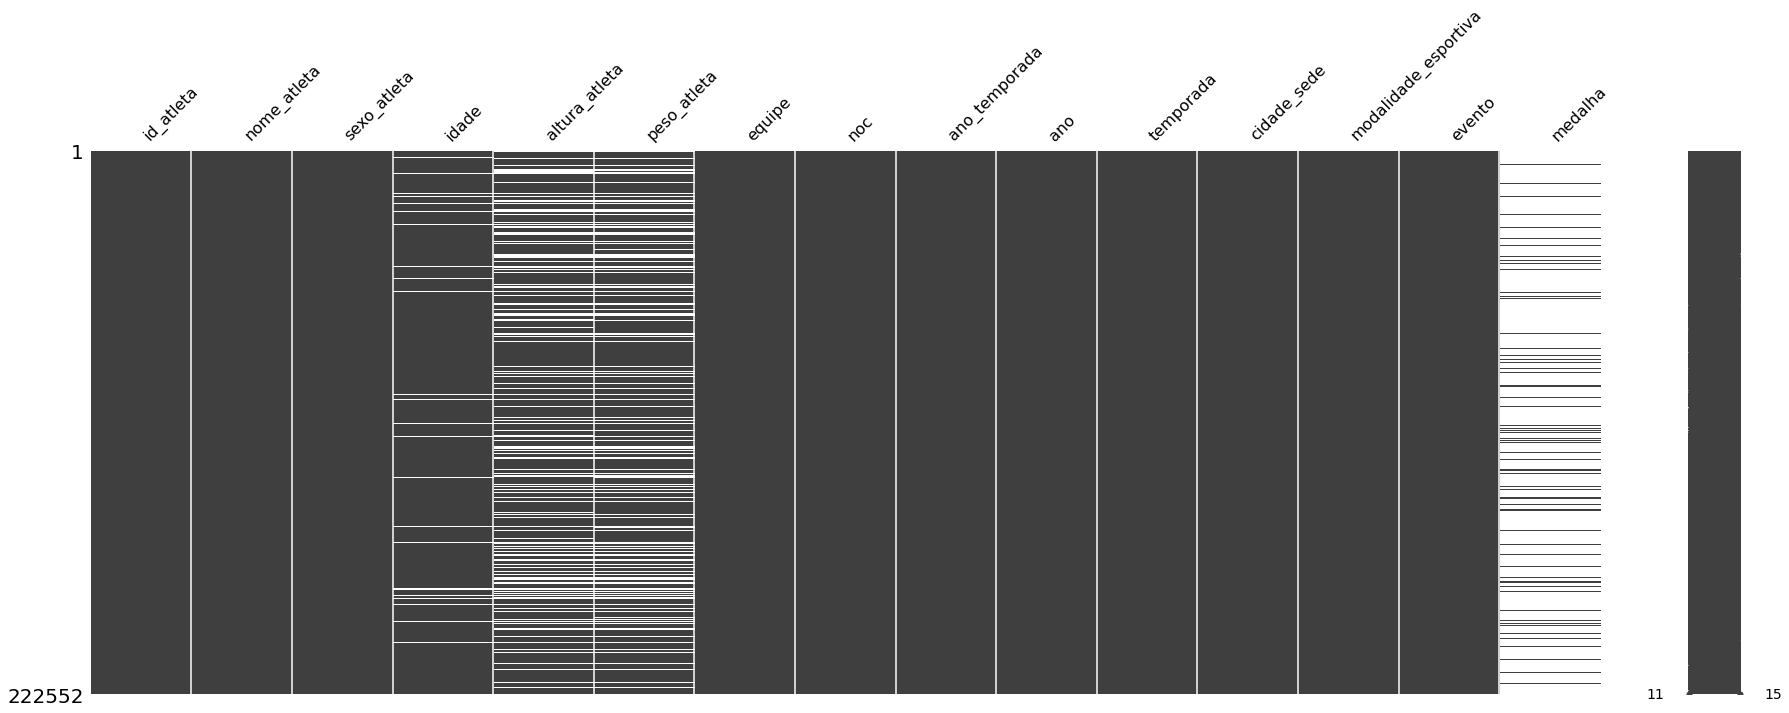

In [ ]:
missingno.matrix(df_atleta, figsize = (30,10))

###Duplicatas

In [ ]:
df_atleta[df_atleta.duplicated()]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [ ]:
df_atleta.shape

(222552, 15)

In [ ]:
df_atleta.drop_duplicates(inplace=True)

In [ ]:
df_atleta[df_atleta.duplicated()]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha


In [ ]:
df_atleta.shape

(221167, 15)

###Avaliando as Features(Colunas)

In [ ]:
df_atleta.head(2)

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


id_atleta - Identificação única de cada atleta

In [ ]:
df_atleta["nome_atleta"].nunique()

116122

###sexo_atleta

In [ ]:
df_atleta["sexo_atleta"].unique()

array(['M', 'F'], dtype=object)

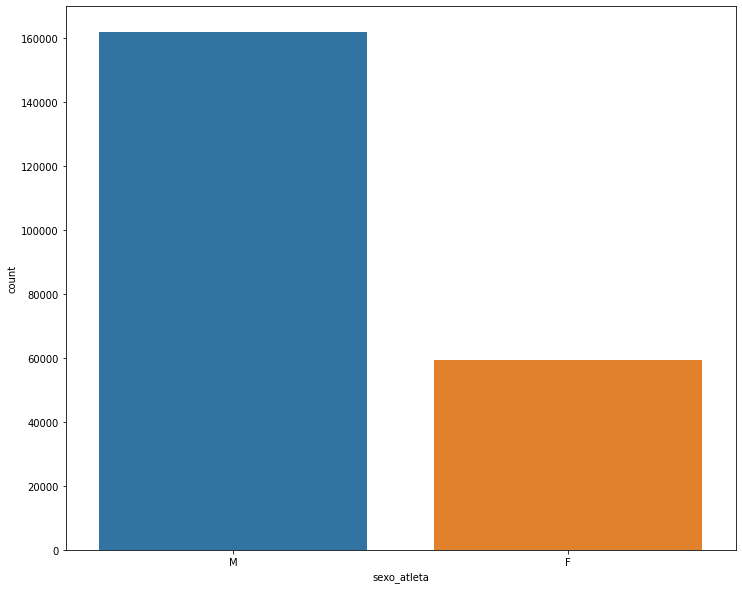

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x= "sexo_atleta", data= df_atleta)
plt.show()

In [ ]:
df_atleta["sexo_atleta"].value_counts()

M    161868
F     59299
Name: sexo_atleta, dtype: int64

###Idade_atleta - Idade do atleta

In [ ]:
df_atleta["idade"].nunique()

74

In [ ]:
df_atleta.describe()

,id_atleta,idade,altura_atleta,peso_atleta,ano
count,221167.000000,212137.000000,170667.000000,168661.000000,221167.000000
mean,68016.867403,25.549367,175.515560,70.688298,1976.602486
std,39144.711847,6.434035,10.914843,14.805242,30.820855
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34011.500000,21.000000,168.000000,60.000000,1960.000000
50%,68342.000000,24.000000,175.000000,70.000000,1984.000000
75%,101904.500000,28.000000,183.000000,79.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
df_atleta["idade"].min()

10.0

In [ ]:
df_atleta["idade"].max()

97.0

In [ ]:
df_atleta[df_atleta["idade"] == 97.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [ ]:
df_atleta[df_atleta["idade"] == 96.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


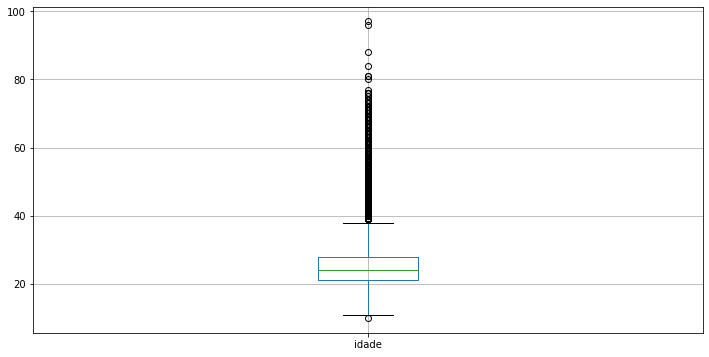

In [ ]:
plt.figure(figsize=(12,6))
df_atleta.boxplot("idade")
plt.show()

In [ ]:
df_atleta[df_atleta["idade"] == 10.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [ ]:
df_atleta["idade"] == 10.0

0         False
1         False
2         False
3         False
26        False
          ...  
271106    False
271107    False
271108    False
271109    False
271110    False
Name: idade, Length: 221167, dtype: bool

In [ ]:
df_atleta["idade"].describe()

count    212137.000000
mean         25.549367
std           6.434035
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: idade, dtype: float64

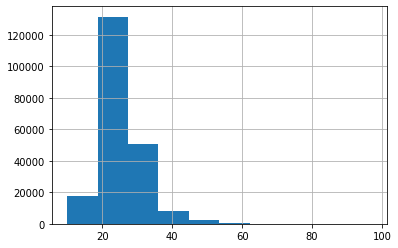

In [ ]:
df_atleta["idade"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição Idade')

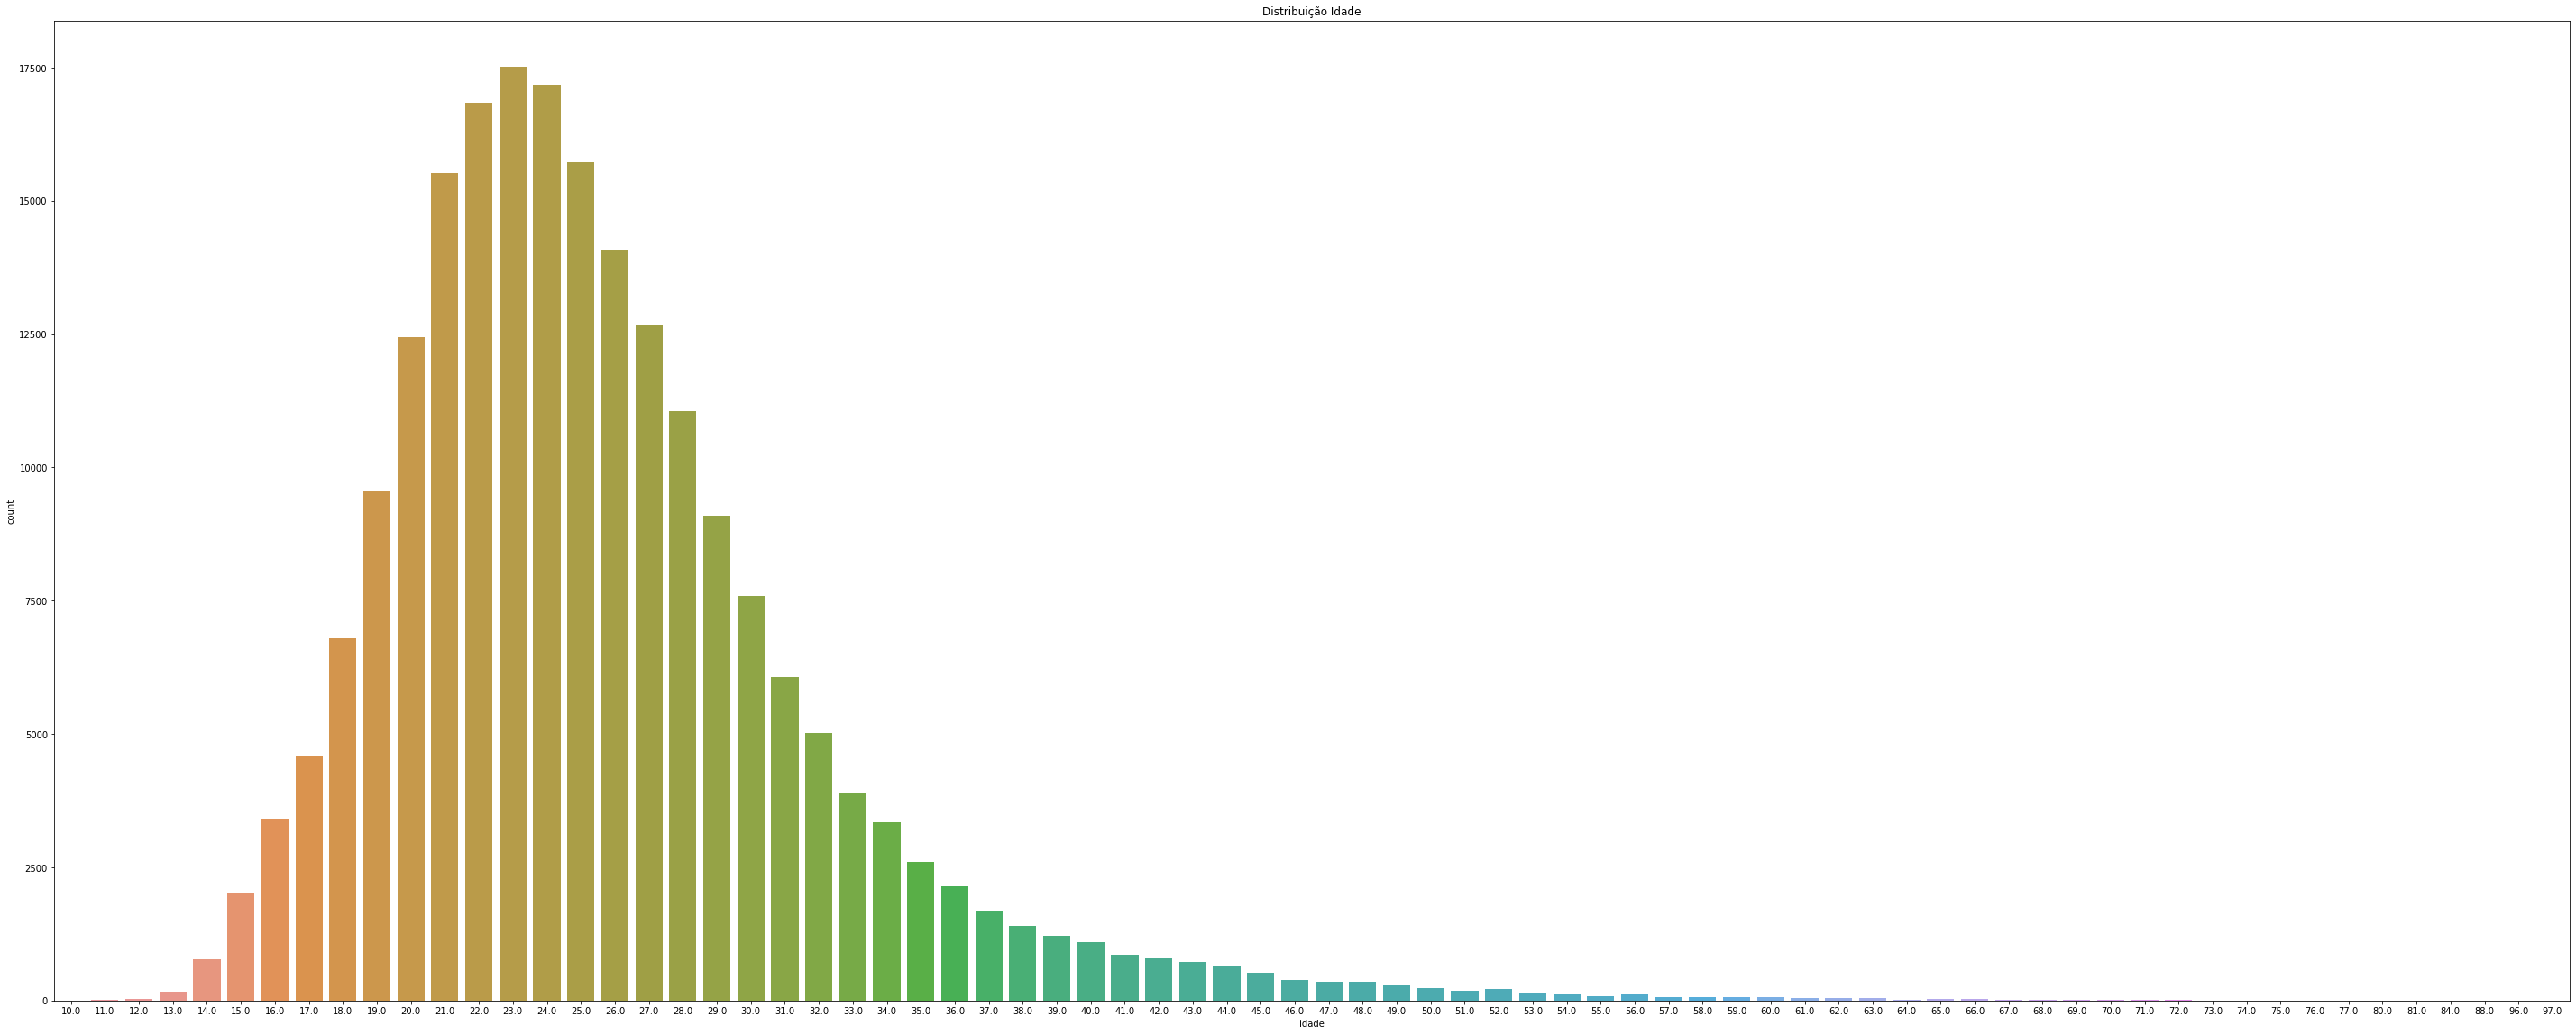

In [ ]:
plt.figure(figsize=(50,20))
plt.tight_layout()
sns.countplot(df_atleta["idade"])
plt.title("Distribuição Idade")

In [ ]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


### altura_atleta - Altura_atleta

In [ ]:
df_atleta["altura_atleta"].nunique()

95

In [ ]:
df_atleta["altura_atleta"].min()

127.0

In [ ]:
df_atleta["altura_atleta"].max()

226.0

In [ ]:
df_atleta["altura_atleta"].describe()

count    170667.000000
mean        175.515560
std          10.914843
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: altura_atleta, dtype: float64

In [ ]:
df_atleta[df_atleta["altura_atleta"] == 127.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,NaN
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,NaN
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,NaN
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,NaN
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN


In [ ]:
df_atleta[df_atleta["altura_atleta"] == 226.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN


In [ ]:
df_atleta_acima200 = df_atleta[df_atleta["altura_atleta"] >= 200.0]

In [ ]:
df_atleta_acima200["modalidade_esportiva"].unique()

array(['Volleyball', 'Basketball', 'Rowing', 'Judo', 'Swimming',
       'Taekwondo', 'Athletics', 'Handball', 'Beach Volleyball', 'Tennis',
       'Wrestling', 'Water Polo', 'Sailing', 'Football', 'Canoeing',
       'Cycling', 'Boxing', 'Shooting', 'Weightlifting', 'Fencing',
       'Badminton', 'Hockey', 'Baseball'], dtype=object)